In [1]:
#Modelling

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Logistic Regression
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [4]:
df_model = pd.read_excel('covid_restaurant_full_post_VIF.xlsx')
df_model.head(10)

,rating,price,pickup,delivery,restaurant_reservation,total_restaurants_zip,Total_Reviews_Zip,Average_Rating_Zip,Average_Price_Zip,hotdogs,...,Urban_influence_code_2013,Metro_2013,Unemployment_rate_2020,covid_high,covid_low,covid_moderate,SizeRank,zillow_sfh_sale_price,redfin_days_on_market,is_closed
0,2.5,1,0,0,0,13,703,3.807692,1.615385,0,...,1,1,7.3,0,0,1,388,335737,39,1
1,1.5,1,0,1,0,68,5612,3.169118,1.514706,1,...,1,1,7.4,0,0,0,3,461902,26,0
2,3.0,1,0,0,0,115,14069,3.508696,1.704348,0,...,1,1,7.8,0,0,1,48,393949,30,1
3,3.0,1,0,0,0,195,28703,3.784615,1.558974,0,...,1,1,7.8,0,0,1,48,393949,30,1
4,4.0,1,0,0,0,356,39868,3.737360,1.693820,0,...,2,1,4.8,0,0,0,135,389140,49,1
5,1.5,2,0,0,0,76,7888,3.664474,1.605263,0,...,1,1,10.4,0,0,1,28,190756,31,1
6,4.0,1,0,0,0,43,1374,3.546512,1.465116,0,...,1,1,10.4,0,0,1,28,190756,31,1
7,4.0,1,0,0,0,143,14177,3.325175,1.454545,0,...,1,1,7.4,0,0,0,3,461902,26,1
8,3.5,2,0,0,0,108,5466,3.370370,1.722222,0,...,1,1,9.1,0,0,1,179,203957,63,1
9,4.0,2,0,0,0,73,10137,3.301370,1.671233,0,...,1,1,7.4,0,0,0,3,461902,26,1


In [6]:
X_variables = df_model.iloc[:,:-1]
y = df_model['is_closed']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_variables, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logit = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.62


In [57]:
confusion_matrix_logit = confusion_matrix(y_test, y_pred_logit)
print(confusion_matrix_logit)

[[5717  175]
 [3418  205]]


In [58]:
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.63      0.97      0.76      5892
           1       0.54      0.06      0.10      3623

    accuracy                           0.62      9515
   macro avg       0.58      0.51      0.43      9515
weighted avg       0.59      0.62      0.51      9515



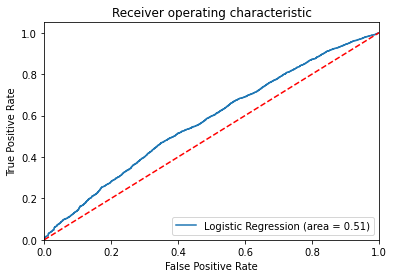

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [65]:
#calculate AUC of model
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit)
print(auc_logit)

0.5134408262142054


In [27]:
#decision tree - https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [60]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_dt = clf_en.predict(X_test)

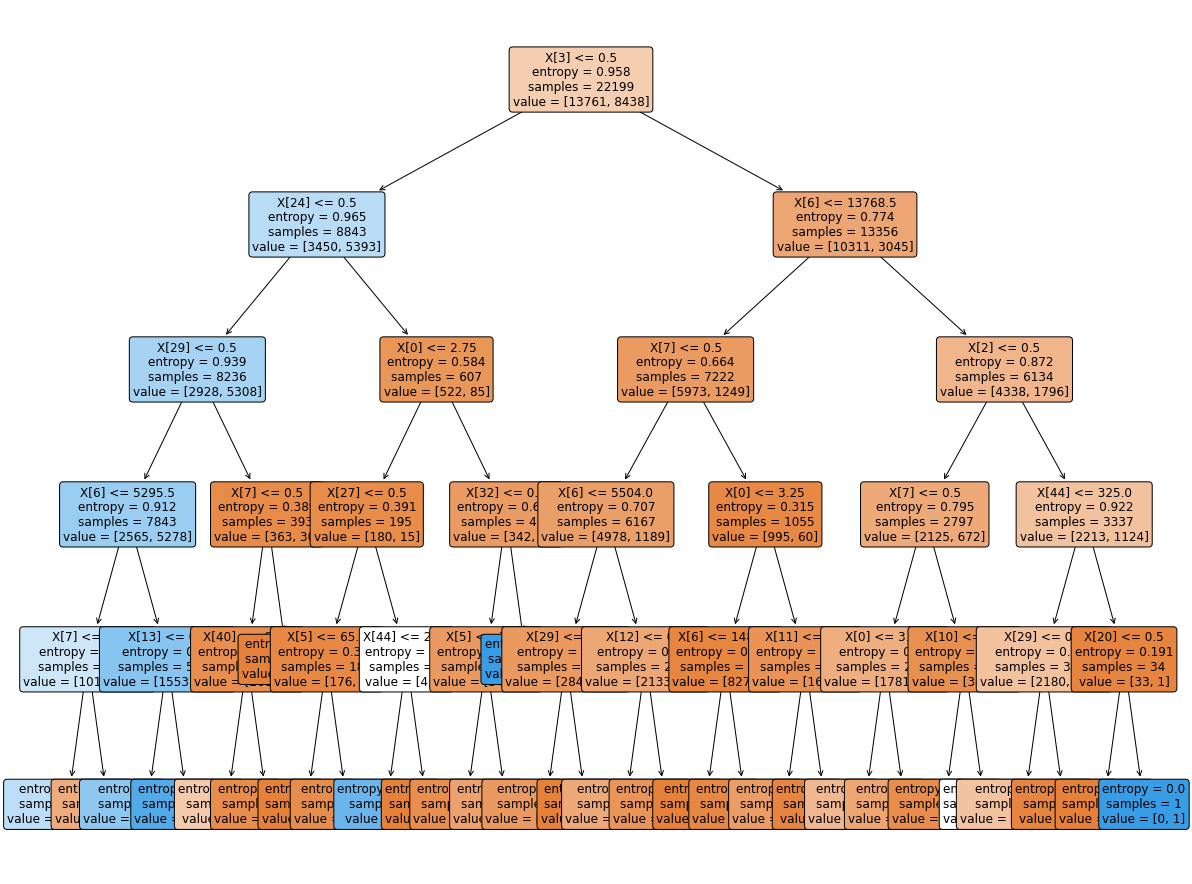

In [61]:
plt.figure(figsize = (20,16))
tree.plot_tree(clf_en, fontsize = 12,rounded = True , filled = True);

In [62]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_dt)))

Model accuracy score with criterion entropy: 0.7478


In [63]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(confusion_matrix_dt)

[[4839 1053]
 [1347 2276]]


In [67]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5892
           1       0.68      0.63      0.65      3623

    accuracy                           0.75      9515
   macro avg       0.73      0.72      0.73      9515
weighted avg       0.74      0.75      0.75      9515



In [68]:
auc_dt = metrics.roc_auc_score(y_test, y_pred_dt)
print(auc_dt)

0.7247458812868454


In [83]:
feature_list_dt = list(X_train.columns)
# Get numerical feature importances
importances = list(clf_en.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_dt, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: delivery             Importance: 0.58
Variable: grocery              Importance: 0.11
Variable: convenience          Importance: 0.11
Variable: Total_Reviews_Zip    Importance: 0.09
Variable: hotdogs              Importance: 0.05
Variable: rating               Importance: 0.01
Variable: pickup               Importance: 0.01
Variable: mexican              Importance: 0.01
Variable: price                Importance: 0.0
Variable: restaurant_reservation Importance: 0.0
Variable: total_restaurants_zip Importance: 0.0
Variable: pizza                Importance: 0.0
Variable: tradamerican         Importance: 0.0
Variable: sandwiches           Importance: 0.0
Variable: burgers              Importance: 0.0
Variable: coffee               Importance: 0.0
Variable: breakfast_brunch     Importance: 0.0
Variable: newamerican          Importance: 0.0
Variable: italian              Importance: 0.0
Variable: chinese              Importance: 0.0
Variable: bars                 Importance: 0.0
Va

In [74]:
# random forest model - https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652
from sklearn.ensemble import RandomForestClassifier

In [75]:
# Instantiate model
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)

In [76]:
print('Model accuracy score for random forest: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))

Model accuracy score for random forest: 0.7370


In [77]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

[[4953  939]
 [1563 2060]]


In [78]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      5892
           1       0.69      0.57      0.62      3623

    accuracy                           0.74      9515
   macro avg       0.72      0.70      0.71      9515
weighted avg       0.73      0.74      0.73      9515



In [79]:
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf)
print(auc_rf)

0.7046104656097922


In [82]:
feature_list_rf = list(X_train.columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_rf, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: delivery             Importance: 0.15
Variable: total_restaurants_zip Importance: 0.13
Variable: Total_Reviews_Zip    Importance: 0.13
Variable: rating               Importance: 0.11
Variable: price                Importance: 0.04
Variable: pickup               Importance: 0.02
Variable: hotdogs              Importance: 0.02
Variable: pizza                Importance: 0.02
Variable: tradamerican         Importance: 0.02
Variable: sandwiches           Importance: 0.02
Variable: mexican              Importance: 0.02
Variable: bars                 Importance: 0.02
Variable: grocery              Importance: 0.02
Variable: convenience          Importance: 0.02
Variable: Unemployment_rate_2020 Importance: 0.02
Variable: SizeRank             Importance: 0.02
Variable: redfin_days_on_market Importance: 0.02
Variable: burgers              Importance: 0.01
Variable: coffee               Importance: 0.01
Variable: breakfast_brunch     Importance: 0.01
Variable: newamerican          Impor

In [ ]:
#Naive Bayes (GaussianNB)
#https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python/notebook

In [84]:
from sklearn.preprocessing import RobustScaler
cols = X_train.columns
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [86]:
y_pred_nb = gnb.predict(X_test)

In [87]:
print('Model accuracy score for Naive Bayes - Gaussian: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score for Naive Bayes - Gaussian: 0.6148


In [88]:
confusion_matrix_rb = confusion_matrix(y_test, y_pred_nb)
print(confusion_matrix_rb)

[[5336  556]
 [3109  514]]


In [89]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.63      0.91      0.74      5892
           1       0.48      0.14      0.22      3623

    accuracy                           0.61      9515
   macro avg       0.56      0.52      0.48      9515
weighted avg       0.57      0.61      0.54      9515



In [90]:
auc_nb = metrics.roc_auc_score(y_test, y_pred_nb)
print(auc_nb)

0.523753068153434


In [ ]:
#XGBoost 
#https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

In [94]:
from scipy.stats import uniform, randint
!pip install xgboost
import xgboost as xgb

     |████████████████████████████████| 1.7 MB 975 kB/s eta 0:00:01


In [95]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
y_pred_xgb = xgb_cl.predict(X_test)

In [96]:
print('Model accuracy score for XGBoost: {0:0.4f}'. format(accuracy_score(y_test, y_pred_xgb)))

Model accuracy score for XGBoost: 0.7634


In [97]:
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print(confusion_matrix_xgb)

[[5073  819]
 [1432 2191]]


In [98]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      5892
           1       0.73      0.60      0.66      3623

    accuracy                           0.76      9515
   macro avg       0.75      0.73      0.74      9515
weighted avg       0.76      0.76      0.76      9515



In [99]:
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb)
print(auc_xgb)

0.7328727051036796


In [100]:
from pickle import dump
dump(xgb_cl, open("xgb_cl"+".p", "wb"))

#model_object = load(open('mrm_xgb_uu_2022-03-24_r5.p',"rb"))